<a href="https://colab.research.google.com/github/Bola-fadipe/my_CV/blob/master/google_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of the chicago bike share


In [161]:
# import necessary libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='dark')
%matplotlib inline

import glob
import missingno as msn

import datetime


In [2]:
pip install opendatasets --upgrade --quiet

In [4]:
import opendatasets as od

In [5]:
files = od.download('https://www.kaggle.com/adriangonzalezcortes/google-cap-stone-project')

Skipping, found downloaded files in "./google-cap-stone-project" (use force=True to force download)


In [6]:
path = 'google-cap-stone-project'
filenames = glob.glob(path + "/*.csv")

In [7]:
#loop through all filenames and read them into a list
dfs = []
df_list = [dfs.append(pd.read_csv(filename)) for filename in filenames]


In [9]:
# Concatenate all datasets vertically into one  DataFrame
df_big = pd.concat(dfs, ignore_index=True)

In [50]:
# save big DataFrame to a new csv file for feature use
df_big.to_csv('google_project_full.csv', index=False)

## getting basic information about the dataset

In [10]:
df = df_big.copy()
df.shape

(3489748, 13)

In [11]:
df.sample(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
2294496,F49463CE5F1BC442,docked_bike,2020-10-10 12:47:48,2020-10-10 13:44:13,Clark St & Randolph St,51,Wabash Ave & Roosevelt Rd,59,41.884576,-87.631889,41.867227,-87.625961,casual
1827575,8BF700FDACD60653,docked_bike,2020-06-21 18:23:12,2020-06-21 18:28:13,Dearborn St & Erie St,110,Orleans St & Hubbard St,636,41.893992,-87.629318,41.890028,-87.636618,member
1618263,0AFD73B4EE9F8387,docked_bike,2020-06-30 18:00:36,2020-06-30 18:18:35,Theater on the Lake,177,Theater on the Lake,177,41.926277,-87.630834,41.926277,-87.630834,member
1415103,E1112C66AB76829D,electric_bike,2021-03-19 12:01:19,2021-03-19 12:22:16,Broadway & Belmont Ave,13277,Broadway & Granville Ave,15571,41.940145,-87.645385,41.994743,-87.660253,member
1409386,FB6B70979AB1C81D,classic_bike,2021-03-30 17:09:53,2021-03-30 17:26:31,Michigan Ave & 14th St,TA1307000124,Shields Ave & 31st St,KA1503000038,41.864059,-87.623727,41.838464,-87.635406,casual


In [12]:
list(df.columns)

['ride_id',
 'rideable_type',
 'started_at',
 'ended_at',
 'start_station_name',
 'start_station_id',
 'end_station_name',
 'end_station_id',
 'start_lat',
 'start_lng',
 'end_lat',
 'end_lng',
 'member_casual']

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3489748 entries, 0 to 3489747
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 346.1+ MB


## Cleaning the data
- check correctness of dtype
- find & handle missing values
- find & handle duplicate values
- drop unwanted column(s)

In [14]:
# convert 'started_at' and 'ended_at' columns to datetime
df.started_at = pd.to_datetime(df.started_at,format='%Y-%m-%d %H:%M:%S')


In [15]:
df.ended_at = pd.to_datetime(df.ended_at,format='%Y-%m-%d %H:%M:%S')

In [16]:
#verify conversion
df.dtypes

ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
dtype: object

In [17]:
# drop the id columns as it won't be needed for analysis
df.drop('ride_id', axis=1, inplace=True)

In [ ]:
# check for missing values
df.isna().sum()

In [ ]:
df.loc[df.start_station_name.isna()]

In [20]:
# drop all rows with missing values
df.dropna(axis=0, how='any', inplace=True)

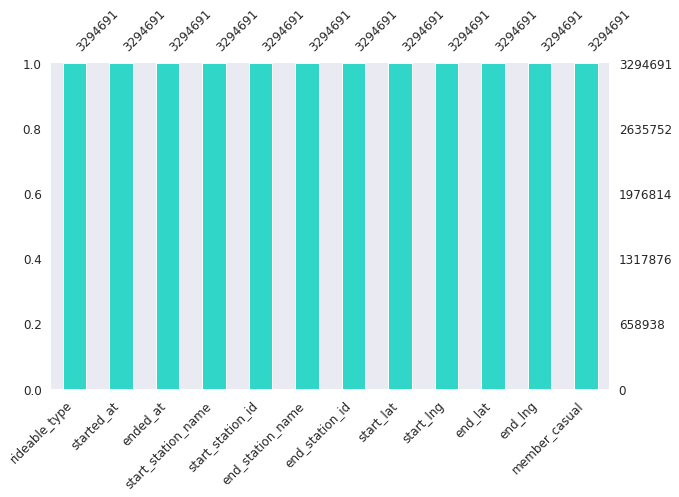

In [23]:
# recheck for missing values
msn.bar(df, color= (0.19, 0.84, 0.78), figsize=(10,6), fontsize=12);

In [24]:
# check for duplicates
df.duplicated().sum()

469

**seems there are 469 duplicate values. further inspection of these values is needed to find out if they are truly duplicate**

In [ ]:
# inspect duplicated rows
df.loc[df.duplicated()]

*from all indication, the values are not truly duplicates*

## Exploratory data analysis

TODOS:-
 - calculate the duration of each ride
 - Univariate analysis
 - Bivariate analysis
 - Correlation matrix


In [26]:
# calculating the duration of each ride in minutes
df['duration_of_ride'] = df.ended_at - df.started_at
df['duration_of_ride'] = round(df['duration_of_ride']/np.timedelta64(1,'m'),2)

In [27]:
# inserting the newly created column next to 'ended_at' column
col_to_move = df['duration_of_ride']
df.drop('duration_of_ride', axis=1, inplace=True)
df.insert(3, 'duration_of_ride_mins', col_to_move)

In [ ]:
df.head(2)

In [ ]:
df.columns

## Univariate Analysis :
  #### Questions -
  1. which bike rideable type is the commonest?
  2. what is the distribution of the ride duration?
  3. which sation is the most popular start-station?
  4. which is the most popular end-station?
  5. which is the most common membership type?




In [30]:
df.rideable_type.value_counts()

docked_bike      2554291
electric_bike     421786
classic_bike      318614
Name: rideable_type, dtype: int64

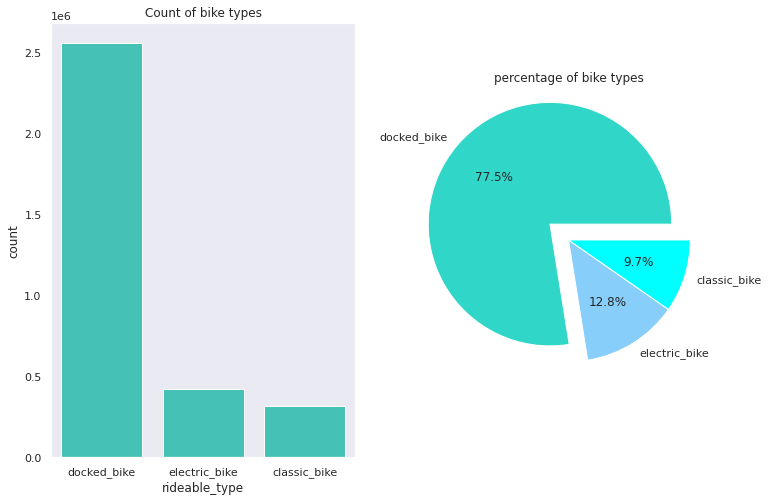

In [31]:
fig = plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.title('Count of bike types')
sns.countplot(x='rideable_type', data=df, color=(0.19, 0.84, 0.78));
plt.subplot(1,2,2)
plt.title('percentage of bike types')
plt.pie(x=df.rideable_type.value_counts(), data=df, autopct='%.1f%%', colors=[(0.19, 0.84, 0.78), 'lightskyblue', 'cyan'],
        labels=df.rideable_type.value_counts().index,
        explode=(0.2,0,0));

**docked bike were the commonest types of rideable bikes, with over 75% of riders using this type**

In [32]:
# analysis of duration of ride
df.duration_of_ride_mins.describe().T

count    3.294691e+06
mean     2.522287e+01
std      3.810944e+02
min     -2.904997e+04
25%      8.030000e+00
50%      1.470000e+01
75%      2.687000e+01
max      5.872003e+04
Name: duration_of_ride_mins, dtype: float64

**the minimum ride duration is a negative number. This is most likely an invalid input, so it's necessary to probe further into this particular data.**

In [ ]:
df.loc[df.duration_of_ride_mins < 0]

**10454 entries of the dataset have end-time that were earlier than the start-time. These are wrongly entered values in the dataset. A discussion with the company about this finding will be necessary. For now, it will suffice to drop all such rows.**

In [41]:
# remove all rows containing negative duration
df = df.loc[~(df.duration_of_ride_mins < 0)]


In [ ]:
df.loc[df.duration_of_ride_mins == 0]

**in these entries, no ride was made as duration was 0 (start_at == end_at).  It is equally obviious that the start_station and end_station names are same. It may be assumed that the riders only came to register, although this assumption can only be clarified by the company's data entry team. For now, we may as well remove these from the data**

In [47]:
df = df.loc[df.duration_of_ride_mins > 0]

In [49]:
df.duration_of_ride_mins.describe().T

count    3.283948e+06
mean     2.805185e+01
std      2.590456e+02
min      2.000000e-02
25%      8.080000e+00
50%      1.477000e+01
75%      2.692000e+01
max      5.872003e+04
Name: duration_of_ride_mins, dtype: float64

In [60]:
# commonest start station
df.start_station_name.value_counts()

Streeter Dr & Grand Ave            34904
Clark St & Elm St                  31818
Lake Shore Dr & Monroe St          29480
Theater on the Lake                29347
Lake Shore Dr & North Blvd         26725
                                   ...  
Kedzie Ave & 110th St                  3
W Washington Blvd & N Peoria St        3
N Carpenter St & W Lake St             1
Stewart Ave & 63rd St (*)              1
N Hampden Ct & W Diversey Ave          1
Name: start_station_name, Length: 702, dtype: int64

In [58]:
df.end_station_name.value_counts()

Streeter Dr & Grand Ave          37181
Clark St & Elm St                31758
Theater on the Lake              30971
Lake Shore Dr & Monroe St        29006
Lake Shore Dr & North Blvd       27347
                                 ...  
Torrence Ave & 126th Pl              3
Kedzie Ave & 110th St                2
N Damen Ave & W Wabansia St          2
Avenue L & 114th St                  1
N Hampden Ct & W Diversey Ave        1
Name: end_station_name, Length: 704, dtype: int64

**'Streeter Dr & Grand Ave' is the most popular start, as well as, end station, while the least number of rides start and end at 'N Hampden Ct & W Diversey Ave'**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


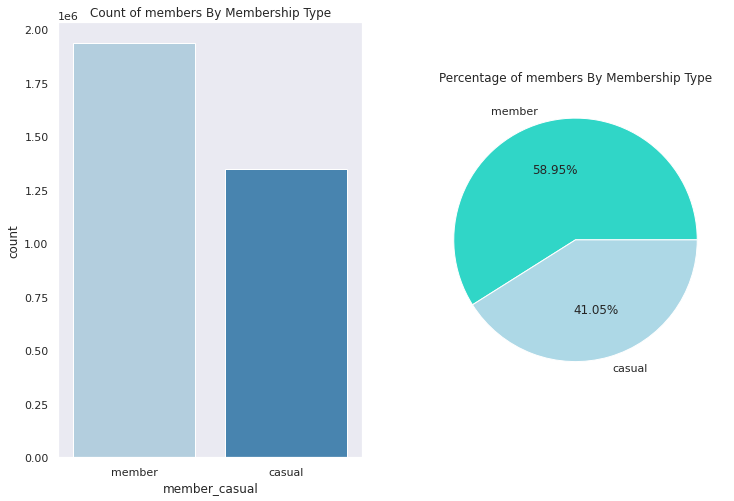

In [69]:
 # commonest membership type

 fig = plt.figure(figsize=(12,8))
 plt.subplot(1,2,1)
 plt.title('Count of members By Membership Type')
 sns.countplot(df.member_casual, palette='Blues'); 
 plt.subplot(1,2,2)
 plt.title('Percentage of members By Membership Type')
 color = [(0.19, 0.84, 0.78), 'lightblue']
 label=df.member_casual.value_counts().index
 plt.pie(x=df.member_casual.value_counts(), data=df, autopct='%1.2f%%', colors=color, labels=label);

##Bivariate Analysis

####Task: The company wants to know how their annual members and casual riders use Cyclistic bikes differently

####TODOS: 
 - group df by membership type
 -find relationship between the type of bike and membership type
 -compare the average duration of ride by membership type
 

In [70]:
df.columns

Index(['rideable_type', 'started_at', 'ended_at', 'duration_of_ride_mins',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

In [71]:
df.head(3)

,rideable_type,started_at,ended_at,duration_of_ride_mins,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,docked_bike,2020-08-20 18:08:14,2020-08-20 18:17:51,9.62,Lake Shore Dr & Diversey Pkwy,329,Clark St & Lincoln Ave,141,41.932588,-87.636427,41.915689,-87.634600,member
1,electric_bike,2020-08-27 18:46:04,2020-08-27 19:54:51,68.78,Michigan Ave & 14th St,168,Michigan Ave & 14th St,168,41.864379,-87.623681,41.864221,-87.623439,casual
2,electric_bike,2020-08-26 19:44:14,2020-08-26 21:53:07,128.88,Columbus Dr & Randolph St,195,State St & Randolph St,44,41.884641,-87.619549,41.884971,-87.627574,casual


In [96]:
mem_bike_type = df.groupby(by='member_casual')['rideable_type'].value_counts()

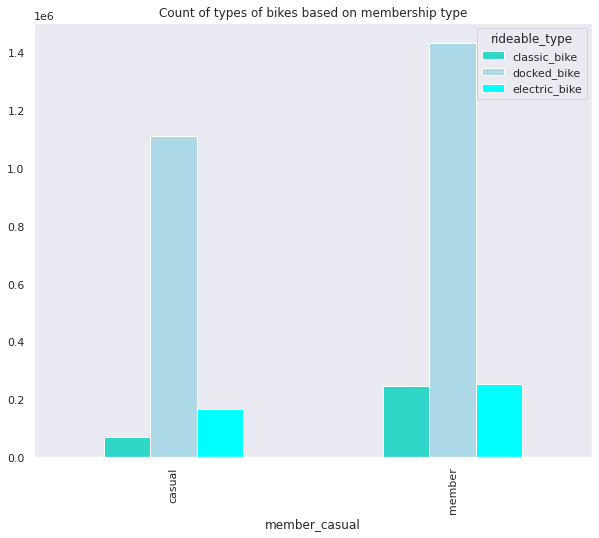

In [106]:
colors = [(0.19, 0.84, 0.78), 'lightblue', 'cyan']
mem_bike_type.unstack().plot(kind='bar', title='Count of types of bikes based on membership type', figsize=(10,8), color=colors);

In [134]:
df['ride_hour'] = df.started_at.dt.hour

In [135]:
df.columns

Index(['rideable_type', 'started_at', 'ended_at', 'duration_of_ride_mins',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'ride_hour'],
      dtype='object')

In [143]:
df.ride_hour.max()

23

<Figure size 1152x648 with 0 Axes>

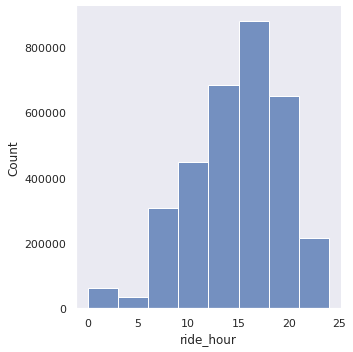

In [164]:
plt.figure(figsize=(16,9))
bins = [0,3,6,9,12,15,18,21,24]
sns.displot(df.ride_hour, kind='hist', bins=bins);


In [165]:
memb_by_hour = df.groupby('member_casual')['ride_hour'].mean()

In [166]:
memb_by_hour

member_casual
casual    14.745437
member    14.012731
Name: ride_hour, dtype: float64

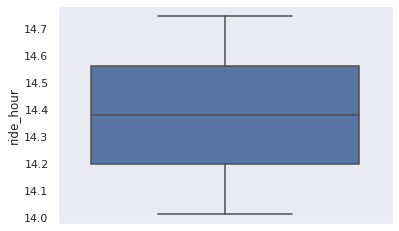

In [172]:
sns.boxplot(y = memb_by_hour)